
#**MNIST DATASET IMPLEMENTATION IN CNN** 

#1. IMPORTING THE  MNIST DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
%matplotlib inline


In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print("length of training dataset is %d"  % len(x_train))
print("length of testing dataset is %d" % len(x_test))

11501568/11490434 [==============================] - 0s 0us/step
length of training dataset is 60000
length of testing dataset is 10000


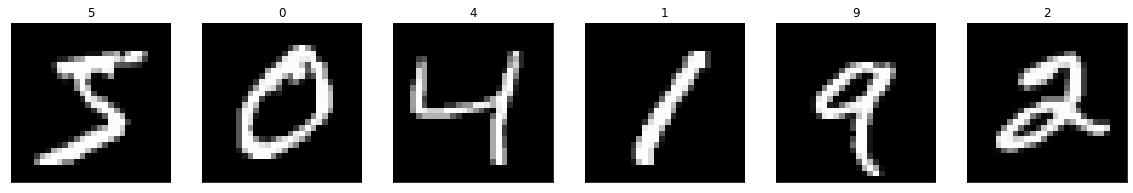

In [3]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
  ax = fig.add_subplot(1,6, i+1, xticks=[], yticks=[])
  ax.imshow(x_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

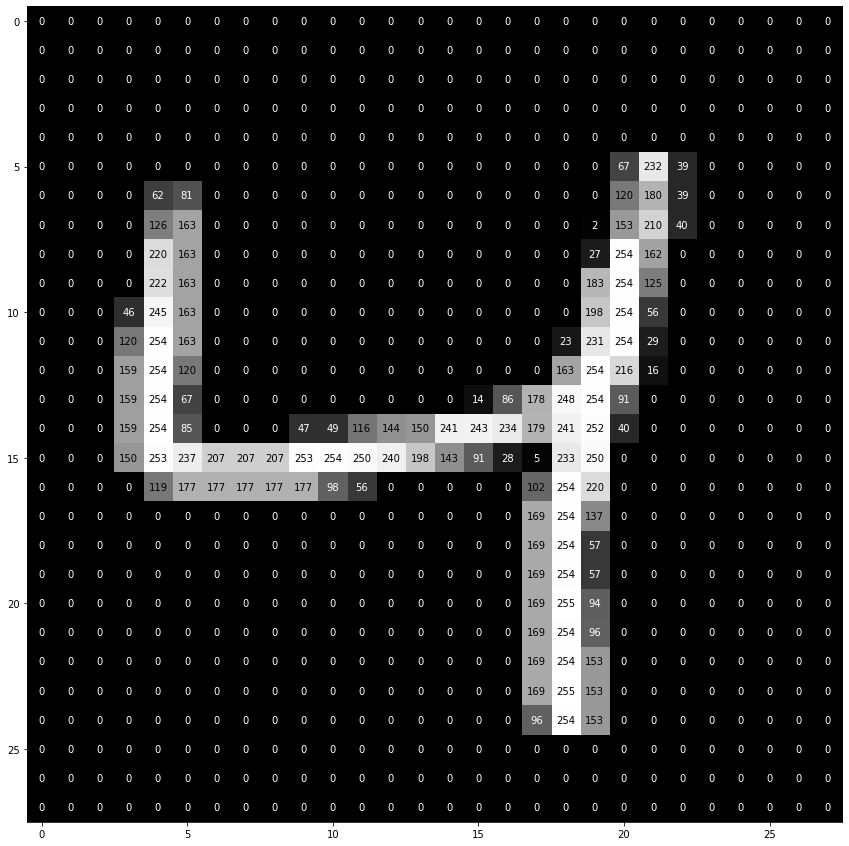

In [4]:
def visualize_input(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max()/2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y])), xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if img[x][y]<thresh else 'black')
      

fig= plt.figure(figsize=(15,15))
ax= fig.add_subplot(111)
visualize_input(x_train[2], ax)

#2. PREPROCESSING THE IMAGE

In [5]:
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255 

print("x_train shape is" ,x_train.shape)
print("x_test shape is " , x_test.shape)

x_train shape is (60000, 28, 28)
x_test shape is  (10000, 28, 28)


#3. USING ONE HOT ENCODING TO LABEL THE DATA

In [6]:
from keras.utils import np_utils
num_classes = 10
print('Integer values labelled are :')
print(y_train[:10])

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print('ONE-HOT labelled are :')
print(y_train[:10])

Integer values labelled are :
[5 0 4 1 9 2 1 3 1 4]
ONE-HOT labelled are :
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#4. RESHAPING INPUT SHAPE 

In [25]:
img_rows, img_cols = 28,28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
input_shape = (img_rows, img_cols, 1)

print("input_shape   ", input_shape)
print("x_test shape  ", x_test.shape)
print("x_train shape ", x_train.shape)



input_shape    (28, 28, 1)
x_test shape   (10000, 28, 28, 1)
x_train shape  (60000, 28, 28, 1)


#**5. CREATING THE MODEL**

#MODEL 1

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
model1 = Sequential()

# layer 1
model1.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1))) # 28*28*1
model1.add(MaxPooling2D(pool_size=(2,2))) # 14*14*1

# layer 2
model1.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu')) # 14*14*1
model1.add(MaxPooling2D(pool_size=(2,2))) # 7*7*1

# layer 3
model1.add(Flatten())

# layer 4
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

#6. COMPILING THE MODEL



In [9]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#7. TRAINING THE MODEL



In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
path = 'model1.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath= path, verbose=1, save_best_only=True)

hist = model1.fit(x_train, y_train,
                 batch_size=64, epochs=10, 
                 validation_data=(x_test, y_test), callbacks=[checkpointer], 
                 verbose=2, shuffle=True)

Epoch 1/10
938/938 - 35s - loss: 0.1581 - accuracy: 0.9521 - val_loss: 0.0515 - val_accuracy: 0.9829

Epoch 00001: val_loss improved from inf to 0.05146, saving model to model1.weights.best.hdf5
Epoch 2/10
938/938 - 5s - loss: 0.0483 - accuracy: 0.9845 - val_loss: 0.0440 - val_accuracy: 0.9855

Epoch 00002: val_loss improved from 0.05146 to 0.04400, saving model to model1.weights.best.hdf5
Epoch 3/10
938/938 - 5s - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0286 - val_accuracy: 0.9908

Epoch 00003: val_loss improved from 0.04400 to 0.02857, saving model to model1.weights.best.hdf5
Epoch 4/10
938/938 - 5s - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0341 - val_accuracy: 0.9894

Epoch 00004: val_loss did not improve from 0.02857
Epoch 5/10
938/938 - 5s - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0312 - val_accuracy: 0.9900

Epoch 00005: val_loss did not improve from 0.02857
Epoch 6/10
938/938 - 5s - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0356 - val_accuracy: 0.9887

Epoc

#8. Loading the Model with the Best Classification Accuracy on the Validation Set

In [11]:
model1.load_weights(path)

#9. Calculating the model accuracy on test data

In [12]:
score = model1.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy = %.4f%% ' % accuracy)

Test accuracy = 99.1700% 


#MODEL 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
model2 = Sequential()
# layer 1
model2.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1)))  # 28*28*1 as padding is same
model2.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu'))    # 28*28*1 as padding is same 
model2.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu'))    # 28*28*1 as padding is same 
model2.add(MaxPooling2D(pool_size=(2,2) ))   # 14*14*1

# layer 2
model2.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu'))    # 14*14*1 as padding is same
model2.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu'))    # 14*14*1 as padding is same 
model2.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu'))    # 14*14*1 as padding is same 
model2.add(MaxPooling2D(pool_size=(2,2)))   # 7*7*1

# layer 3
model2.add(Flatten())

# layer 4
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint
path = 'model2.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath= path, 
                               verbose=1, 
                               save_best_only=True)

hist = model2.fit(x_train, y_train,
                 batch_size=64, epochs=10, 
                 validation_data=(x_test, y_test), callbacks=[checkpointer], 
                 verbose=2, shuffle=True)

model2.load_weights(path)

In [15]:
score = model2.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy = %.4f%% ' % accuracy)

Test accuracy = 99.3100% 


#MODEL 3

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
model3 = Sequential()
# layer 1
model3.add(Conv2D(32, kernel_size=(3, 3), padding='valid',activation='selu',input_shape=(28,28,1)))  # 26*26*1 as padding is same 
model3.add(Conv2D(32, kernel_size=(3, 3), padding='valid',activation='selu'))    # 24*24*1 as padding is same 
model3.add(Conv2D(32, kernel_size=(3, 3), padding='valid',activation='selu'))    # 22*22*1 as padding is same 
model3.add(MaxPooling2D(pool_size=(2,2) ))   # 11*11*1

# layer 2
model3.add(Conv2D(64, kernel_size=(3, 3), padding='valid',activation='selu'))    # 9*9*1 as padding is same
model3.add(Conv2D(64, kernel_size=(3, 3), padding='valid',activation='selu'))    # 7*7*1 as padding is same 
model3.add(Conv2D(64, kernel_size=(3, 3), padding='valid',activation='selu'))    # 5*5*1 as padding is same 
model3.add(MaxPooling2D(pool_size=(2,2)))   # 2*2*1

# layer 3
model3.add(Flatten())

# layer 4
model3.add(Dense(64, activation='selu'))
model3.add(Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 5, 64)         

In [17]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint
path = 'model3.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath= path, 
                               verbose=1, 
                               save_best_only=True)

hist = model3.fit(x_train, y_train,
                 batch_size=64, epochs=10, 
                 validation_data=(x_test, y_test), callbacks=[checkpointer], 
                 verbose=2, shuffle=True)

model3.load_weights(path)


Epoch 1/10
938/938 - 12s - loss: 0.1737 - accuracy: 0.9470 - val_loss: 0.0947 - val_accuracy: 0.9698

Epoch 00001: val_loss improved from inf to 0.09474, saving model to model3.weights.best.hdf5
Epoch 2/10
938/938 - 11s - loss: 0.0807 - accuracy: 0.9768 - val_loss: 0.0656 - val_accuracy: 0.9811

Epoch 00002: val_loss improved from 0.09474 to 0.06557, saving model to model3.weights.best.hdf5
Epoch 3/10
938/938 - 10s - loss: 0.0598 - accuracy: 0.9829 - val_loss: 0.0660 - val_accuracy: 0.9829

Epoch 00003: val_loss did not improve from 0.06557
Epoch 4/10
938/938 - 10s - loss: 0.0525 - accuracy: 0.9856 - val_loss: 0.0554 - val_accuracy: 0.9840

Epoch 00004: val_loss improved from 0.06557 to 0.05543, saving model to model3.weights.best.hdf5
Epoch 5/10
938/938 - 10s - loss: 0.0466 - accuracy: 0.9863 - val_loss: 0.0527 - val_accuracy: 0.9862

Epoch 00005: val_loss improved from 0.05543 to 0.05273, saving model to model3.weights.best.hdf5
Epoch 6/10
938/938 - 10s - loss: 0.0414 - accuracy: 0.9

In [18]:
score = model3.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy = %.4f%% ' % accuracy)

Test accuracy = 98.7300% 


#MODEL 4

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
model4 = Sequential()
# layer 1
model4.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='tanh',input_shape=(28,28,1))) # 28*28*1 as padding is same 
model4.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='tanh'))    # 28*28*1 as padding is same 
model4.add(MaxPooling2D(pool_size=(2,2) ))                                      # 14*14*1

# layer 2
model4.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu'))    # 14*14*1 as padding is same 
model4.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu'))    # 14*14*1 as padding is same
model4.add(MaxPooling2D(pool_size=(2,2)))                                       # 7*7*1
# layer 2

model4.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation='selu'))   # 7*7*1 as padding is same 
model4.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation='selu'))   # 7*7*1 as padding is same 
model4.add(MaxPooling2D(pool_size=(2,2)))                                       # 3*3*1

# layer 3
model4.add(Flatten())

# layer 4
model4.add(Dense(128, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 128)        

In [20]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint
path = 'model4.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath= path, 
                               verbose=1, 
                               save_best_only=True)

hist = model4.fit(x_train, y_train,
                 batch_size=64, epochs=10, 
                 validation_data=(x_test, y_test), callbacks=[checkpointer], 
                 verbose=2, shuffle=True)

model4.load_weights(path)


Epoch 1/10
938/938 - 14s - loss: 0.1148 - accuracy: 0.9647 - val_loss: 0.0343 - val_accuracy: 0.9893

Epoch 00001: val_loss improved from inf to 0.03429, saving model to model4.weights.best.hdf5
Epoch 2/10
938/938 - 13s - loss: 0.0435 - accuracy: 0.9868 - val_loss: 0.0353 - val_accuracy: 0.9885

Epoch 00002: val_loss did not improve from 0.03429
Epoch 3/10
938/938 - 13s - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0357 - val_accuracy: 0.9901

Epoch 00003: val_loss did not improve from 0.03429
Epoch 4/10
938/938 - 13s - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0399 - val_accuracy: 0.9876

Epoch 00004: val_loss did not improve from 0.03429
Epoch 5/10
938/938 - 13s - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0391 - val_accuracy: 0.9885

Epoch 00005: val_loss did not improve from 0.03429
Epoch 6/10
938/938 - 13s - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0340 - val_accuracy: 0.9906

Epoch 00006: val_loss improved from 0.03429 to 0.03397, saving model to model4.weights.best

In [21]:
score = model4.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy = %.4f%% ' % accuracy)

Test accuracy = 99.0600% 


#MODEL 5

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
model5 = Sequential()
# layer 1
model5.add(Conv2D(16, kernel_size=(3, 3), padding='valid',activation='relu',input_shape=(28,28,1))) # 28*28*1 as padding is same
model5.add(Conv2D(32, kernel_size=(3, 3), padding='valid',activation='relu'))    # 28*28*1 as padding is same 
model5.add(Conv2D(64, kernel_size=(3, 3), padding='valid',activation='relu'))    # 28*28*1 as padding is same 
model5.add(MaxPooling2D(pool_size=(2,2) ))   # 14*14*1

# layer 2
model5.add(Conv2D(64, kernel_size=(3, 3), padding='valid',activation='selu'))    # 12*12*1
model5.add(Conv2D(128, kernel_size=(3, 3), padding='valid',activation='selu'))    # 10*10*1 as padding is same 
model5.add(Conv2D(256, kernel_size=(3, 3), padding='valid',activation='selu'))    # 8*8*1 as padding is same 
model5.add(MaxPooling2D(pool_size=(2,2)))   # 4*4*1

# layer 3
model5.add(Flatten())

# layer 4
model5.add(Dense(64, activation='relu'))
model5.add(Dense(10, activation='softmax'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 128)        

In [23]:
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint
path = 'model5.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath= path, 
                               verbose=1, 
                               save_best_only=True)

hist = model5.fit(x_train, y_train,
                 batch_size=64, epochs=10, 
                 validation_data=(x_test, y_test), callbacks=[checkpointer], 
                 verbose=2, shuffle=True)

model5.load_weights(path)


Epoch 1/10
938/938 - 18s - loss: 0.1253 - accuracy: 0.9620 - val_loss: 0.0522 - val_accuracy: 0.9841

Epoch 00001: val_loss improved from inf to 0.05221, saving model to model5.weights.best.hdf5
Epoch 2/10
938/938 - 17s - loss: 0.0552 - accuracy: 0.9840 - val_loss: 0.0505 - val_accuracy: 0.9839

Epoch 00002: val_loss improved from 0.05221 to 0.05046, saving model to model5.weights.best.hdf5
Epoch 3/10
938/938 - 17s - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0351 - val_accuracy: 0.9893

Epoch 00003: val_loss improved from 0.05046 to 0.03509, saving model to model5.weights.best.hdf5
Epoch 4/10
938/938 - 17s - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0363 - val_accuracy: 0.9897

Epoch 00004: val_loss did not improve from 0.03509
Epoch 5/10
938/938 - 17s - loss: 0.0346 - accuracy: 0.9895 - val_loss: 0.0516 - val_accuracy: 0.9865

Epoch 00005: val_loss did not improve from 0.03509
Epoch 6/10
938/938 - 17s - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0411 - val_accuracy: 0.9869


In [24]:
score = model5.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy = %.4f%% ' % accuracy)

Test accuracy = 98.9300% 
